<a href="https://colab.research.google.com/github/Abdokarawia/Linear-Regerssion/blob/main/Linear_Regerssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [290]:
EDS = pd.read_csv('/content/FuelConsumptionCo2.csv')
EDS.head()   # Showing a sample of the dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [291]:
EDS.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


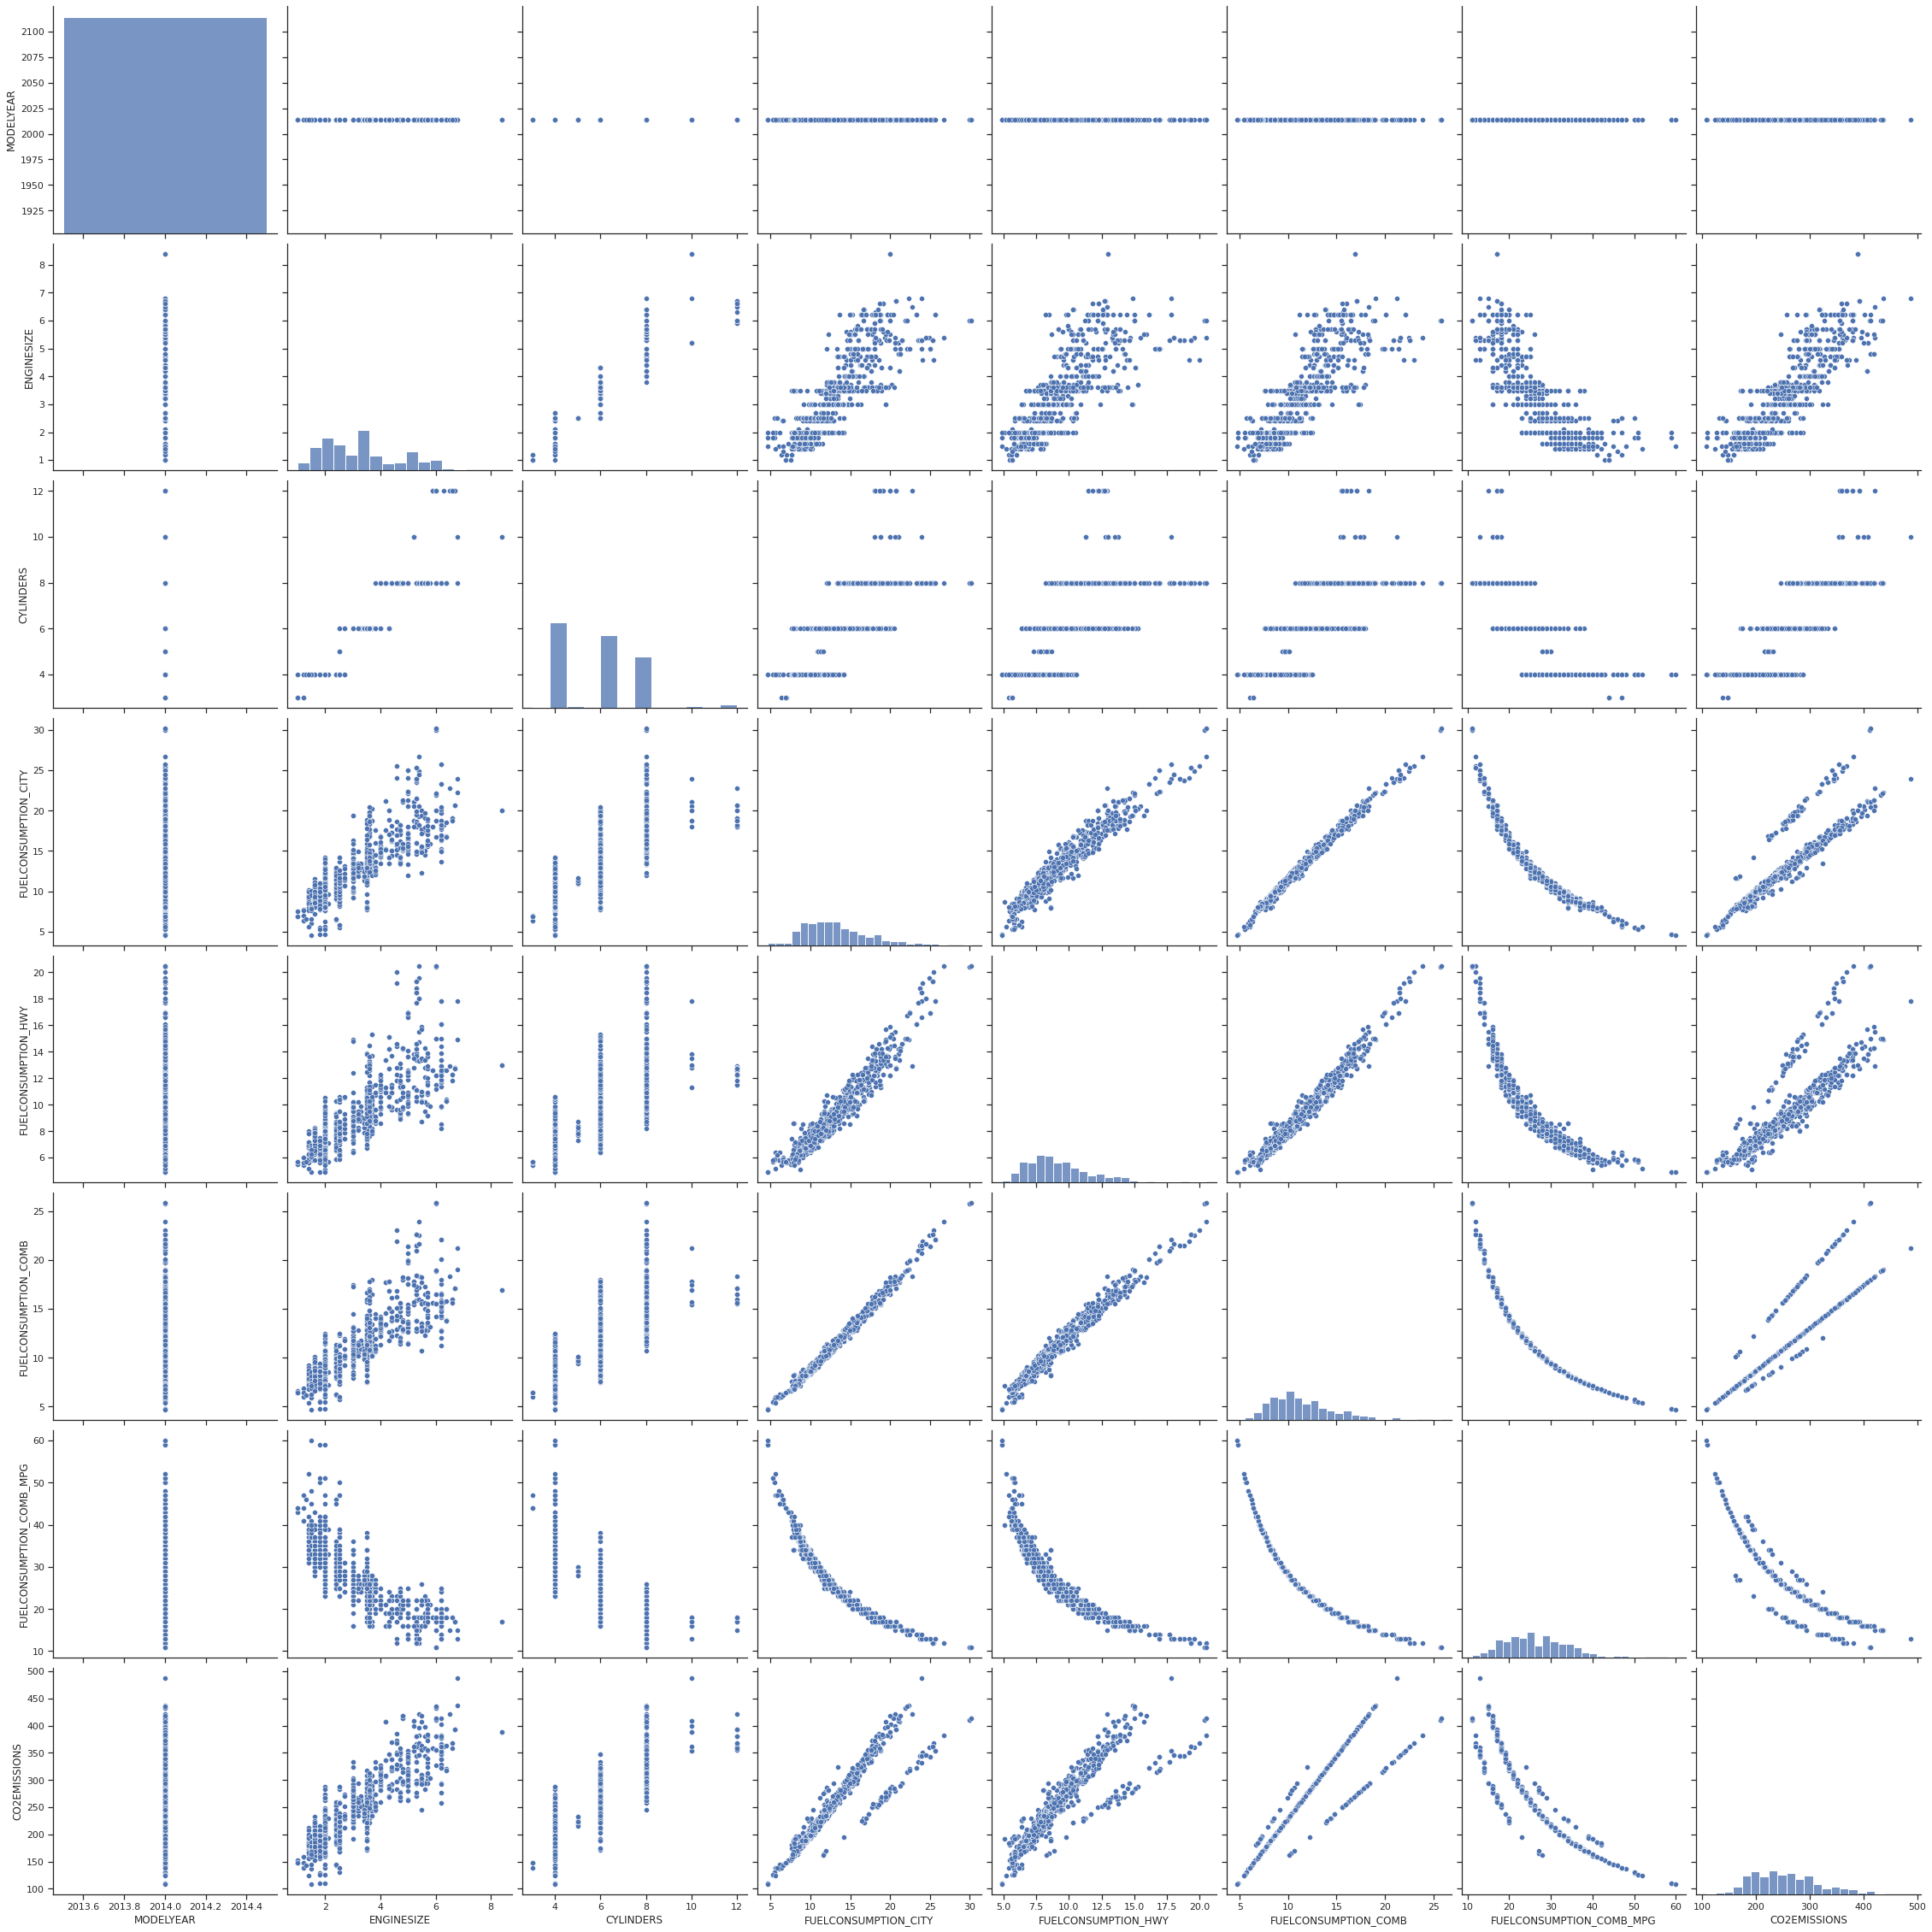

In [292]:
sns.pairplot(EDS , aspect=1 , height=4)
plt.show()

In [293]:
DS = EDS [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',  'FUELCONSUMPTION_CITY', 'CO2EMISSIONS' , 'FUELCONSUMPTION_COMB_MPG' ]] 
DS.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG
0,2.0,4,8.5,9.9,196,33
1,2.4,4,9.6,11.2,221,29
2,1.5,4,5.9,6.0,136,48
3,3.5,6,11.1,12.7,255,25
4,3.5,6,10.6,12.1,244,27
5,3.5,6,10.0,11.9,230,28
6,3.5,6,10.1,11.8,232,28
7,3.7,6,11.1,12.8,255,25
8,3.7,6,11.6,13.4,267,24


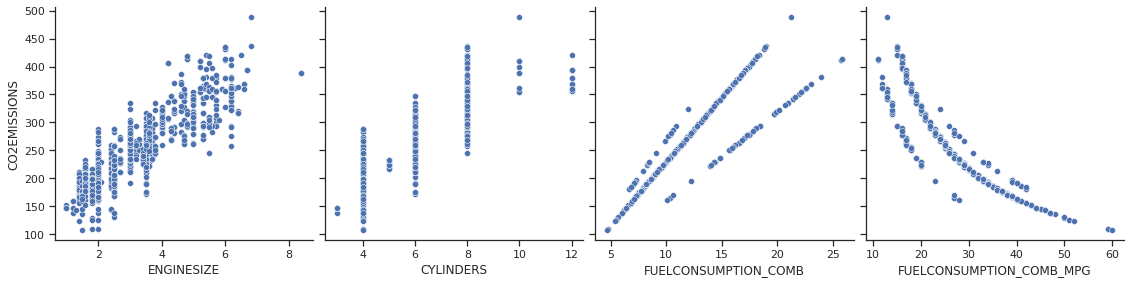

In [294]:
sns.pairplot(data =DS , kind='scatter', height=4,   x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB' , "FUELCONSUMPTION_COMB_MPG"], y_vars="CO2EMISSIONS" )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


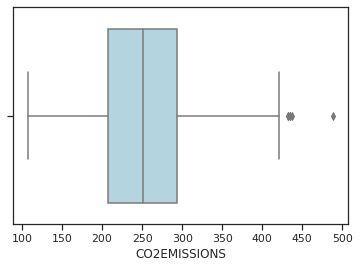

In [295]:
sns.boxplot(DS.CO2EMISSIONS ,color="lightblue")
plt.show()

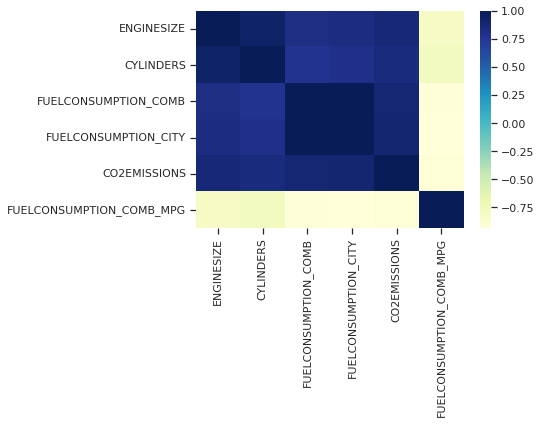

In [296]:
sns.heatmap(DS.corr(), cmap="YlGnBu")
plt.show()

In [297]:
# First Way
mask  = np.random.rand(len(DS)) < 0.75
train = DS[mask]
test  = DS [~mask]

# Second Way
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

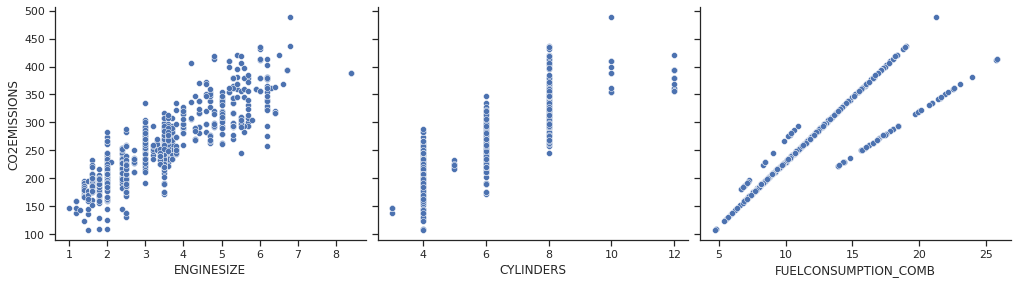

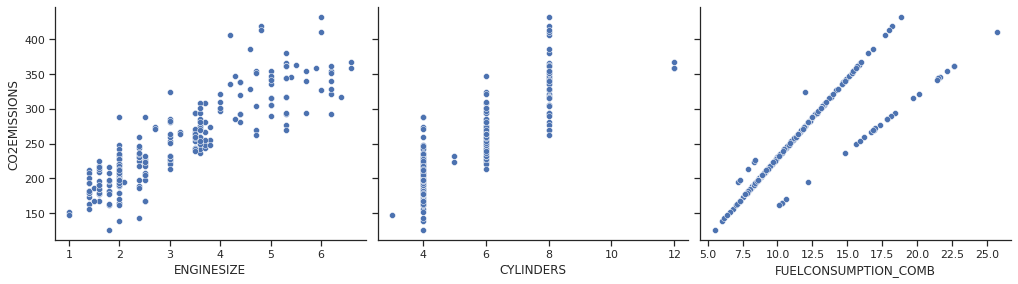

In [298]:
sns.pairplot(data =train , kind='scatter', height=4, aspect=1.2 , x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], y_vars="CO2EMISSIONS" )
sns.pairplot(data =test , kind='scatter', height=4, aspect=1.2 , x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], y_vars="CO2EMISSIONS" )
plt.show()

In [299]:
from sklearn.linear_model import  LinearRegression
LR = LinearRegression()
x_train = np.asarray(train[["ENGINESIZE"]])
y_train = np.asarray(train[["CO2EMISSIONS"]])
x_test  = np.asarray(test[["ENGINESIZE"]])
y_test  = np.asarray(test[["CO2EMISSIONS"]])
LR.fit(x_train , y_train)
intercept = LR.intercept_
coef = LR.coef_

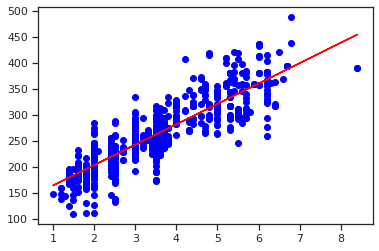

In [300]:
plt.scatter(x_train, y_train , c="blue")
plt.plot(x_train, LR.predict(x_train)  , c="red")
predict_test = LR.predict(x_test)


In [301]:
from sklearn.metrics import r2_score
MAE = np.mean(np.abs(predict_test - y_test))
MSE = np.mean(np.abs(predict_test - y_test) **2 )
R2 = r2_score(y_test , predict_test)
print("Mean absolute error: %.2f" % MAE)
print("Residual sum of squares (MSE): %.2f" % MSE)
print("R2-score: %.4f" % R2 )


Mean absolute error: 21.70
Residual sum of squares (MSE): 855.70
R2-score: 0.7758
